In [45]:
import tensorflow as tf
import keras
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [46]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
print(X_train.shape)
print(X_train.dtype)

(404, 13)
float64


In [47]:
def splitTrainSimply(train_data, valid_rate=0.25):
    data_len = train_data.shape[0]
    border = int(data_len * valid_rate)
    return train_data[border:], train_data[:border]

X_train, X_valid = splitTrainSimply(X_train)
y_train, y_valid = splitTrainSimply(y_train)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(303, 13)
(101, 13)
(303,)
(101,)


In [48]:
from keras import models
from keras import layers
from keras import activations
simple_model = models.Sequential(
    [
        layers.InputLayer(input_shape=X_train.shape[1:]),
        layers.Dense(30, activation=activations.relu),
        layers.Dense(1)
    ]
)

In [49]:
from keras import optimizers
from keras import losses
from keras import metrics
simple_model.compile(
    optimizer=optimizers.SGD(), loss=losses.MeanSquaredError(), metrics=[metrics.MeanAbsoluteError()]
)

In [50]:
history = simple_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
10/10 [==============================] - 0s 15ms/step - loss: 232.2238 - mean_absolute_error: 11.8125 - val_loss: 29.4591 - val_mean_absolute_error: 3.6160
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 26.4400 - mean_absolute_error: 3.6781 - val_loss: 22.6101 - val_mean_absolute_error: 3.1062
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 20.8783 - mean_absolute_error: 3.3325 - val_loss: 24.5649 - val_mean_absolute_error: 3.8009
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 18.0922 - mean_absolute_error: 3.0667 - val_loss: 14.1864 - val_mean_absolute_error: 2.4867
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 14.1457 - mean_absolute_error: 2.6026 - val_loss: 12.9419 - val_mean_absolute_error: 2.3263
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 14.9368 - mean_absolute_error: 2.7471 - val_loss: 14.4345 - val_mean_absolute_error: 2.5446
Epoch 7/20
10

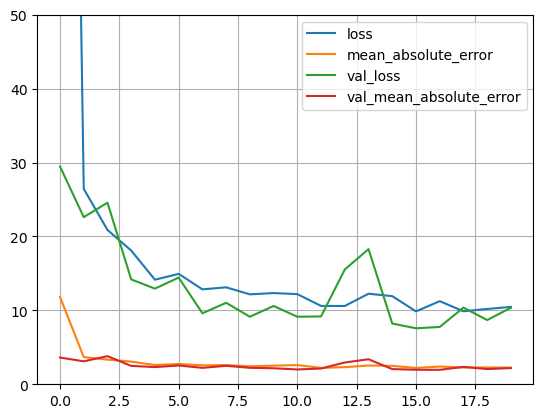

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.ylim((0, 50))
plt.grid(True)

In [53]:
simple_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 18.7923 - mean_absolute_error: 3.2520


[18.792285919189453, 3.2519969940185547]